####**Step 1: Import Libraries**

In [1]:
# Basic Python libraries for data and visuals
import pandas as pd              # to work with dataframes
import numpy as np               # for math stuff (optional for now)
import seaborn as sns            # for visuals
import matplotlib.pyplot as plt  # for charts

#####**Step 2: Load the Dataset**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Pushpak-Bhalavi/CODSOFT/refs/heads/main/Task%202%20-%20Iris%20Flower%20Classification/Data/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### **Step 3: Explore the Dataset**

In [3]:
# Confirm fixed column names
list(df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [4]:
# Number of rows and columns
print("Shape of the dataset:", df.shape)

# Data types of each column
print("\nData types:\n" + df.dtypes.to_string())

# Check for missing valuesdf.info()
print("\nMissing values:\n" + df.isnull().sum().to_string())

Shape of the dataset: (150, 5)

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object

Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0


In [ ]:
# Summary statistics (mean, std, etc.)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Remove the common 'iris-' form 'Species'.
df['species'] = df['species'].str.replace('Iris-', '', regex=False)

# Count each flower species
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


####**Step 4: Encode Target Column**

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
# Step 2: Encode species names into numeric values
le = LabelEncoder()
y = le.fit_transform(y)

# Optional: Check what mapping it used
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}


####**Step 5: Data Visualization**

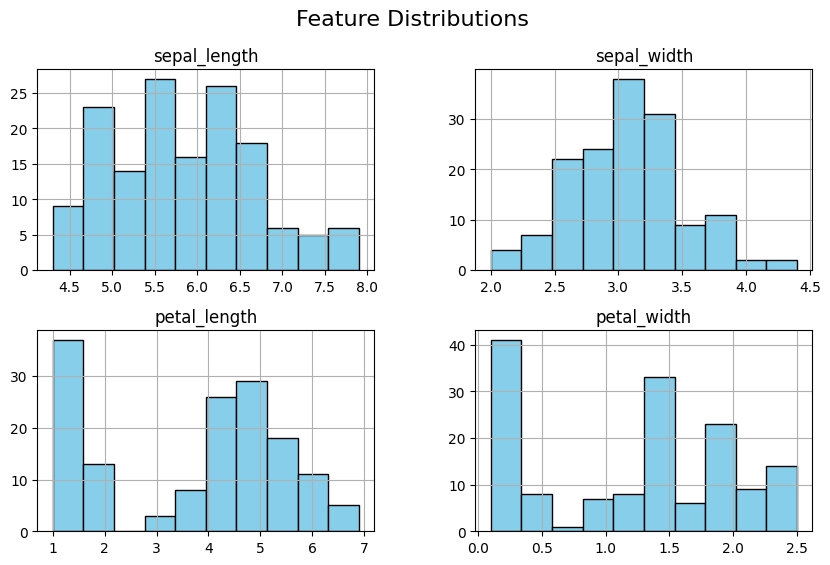

In [17]:
df.hist(figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

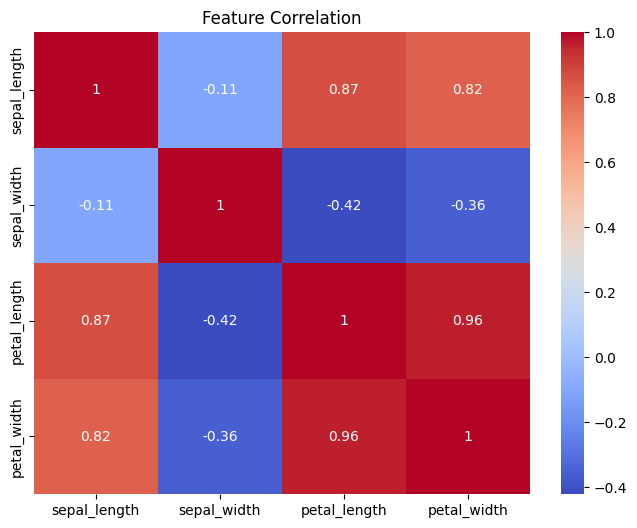

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

####**Step 6: Feature & Target Split**

In [24]:
# Step 1: Define features and target
X = df.drop('species', axis=1)  # Features
y = df['species']               # Target

####**Step 7: Train-Test Split & Feature Scaling**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####**STEP 8: Model Training & Evaluation**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC()
}

In [44]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n\033[1m{name} Results\033[0m")  # Bold model name
    print("-" * 40)
    print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results
----------------------------------------
Accuracy: 93.33 %
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Decision Tree Results
----------------------------------------
Accuracy: 93.33 %
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg     

####**Step 9: Final Model Selection**

**Final Model:** SVC — highest accuracy (96.67%) and strong class-wise performance.


####**Step 10: Save Model and Scaler**

In [50]:
import joblib

# Save the trained SVC model
joblib.dump(SVC, 'iris_svc_model.pkl')

# Save the fitted scaler
joblib.dump(scaler, 'iris_scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
